In [2]:
! pip install pandas

Defaulting to user installation because normal site-packages is not writeable


In [12]:
import pandas as pd
import numpy as np

data = pd.read_csv("troop_movements.csv")
pd.set_option('display.width', 1000)

print(data.head())

             timestamp  unit_id           unit_type empire_or_resistance  location_x  location_y  destination_x  destination_y    homeworld
0  2025-03-17 16:23:15        1               at-st           resistance           9           3              4             10  Glee Anselm
1  2025-03-17 16:23:14        2               at-st           resistance          10           8              5              5     Kashyyyk
2  2025-03-17 16:23:13        3  resistance_soldier           resistance           2           9              2             10    Chandrila
3  2025-03-17 16:23:12        4        stormtrooper               empire           8           2              6              1  Aleen Minor
4  2025-03-17 16:23:11        5             unknown           resistance           6           8              3              3      Iktotch


In [14]:
df = pd.DataFrame(data)

In [35]:
value_counts_empire = df['empire_or_resistance'].value_counts()
dfEmpire = pd.DataFrame(value_counts_empire)
print(dfEmpire)

                      count
empire_or_resistance       
empire                  502
resistance              498


In [19]:
value_counts_homeworld = df['homeworld'].value_counts()
print(value_counts_homeworld)

homeworld
Dagobah         35
Aleen Minor     35
Rodia           32
Toydaria        32
Tatooine        31
Cerea           30
Tholoth         29
Zolan           29
Glee Anselm     29
Bestine IV      28
Eriadu          28
Trandosha       27
Shili           27
Mon Cala        27
Malastare       26
Kalee           24
Iktotch         24
Dorin           24
Tund            24
Troiken         23
Ojom            23
Concord Dawn    23
Sullust         23
Dathomir        22
Quermia         22
Serenno         22
Ryloth          22
Kashyyyk        22
Socorro         21
Skako           21
Champala        21
Alderaan        21
Umbara          21
Haruun Kal      20
Naboo           19
Corellia        18
Stewjon         17
Chandrila       17
Vulpter         17
Mirial          16
Iridonia        15
Muunilinst      13
Name: count, dtype: int64


In [20]:
value_count_type = df['unit_type'].value_counts()
print(value_count_type)

unit_type
resistance_soldier    134
at-st                 129
tie_silencer          128
at-at                 127
stormtrooper          124
unknown               123
tie_fighter           120
x-wing                115
Name: count, dtype: int64


In [24]:
df['is_resistance'] = df['empire_or_resistance'] == 'resistance'

In [25]:
print(df.head())

             timestamp  unit_id           unit_type empire_or_resistance  location_x  location_y  destination_x  destination_y    homeworld  is_resistance
0  2025-03-17 16:23:15        1               at-st           resistance           9           3              4             10  Glee Anselm           True
1  2025-03-17 16:23:14        2               at-st           resistance          10           8              5              5     Kashyyyk           True
2  2025-03-17 16:23:13        3  resistance_soldier           resistance           2           9              2             10    Chandrila           True
3  2025-03-17 16:23:12        4        stormtrooper               empire           8           2              6              1  Aleen Minor          False
4  2025-03-17 16:23:11        5             unknown           resistance           6           8              3              3      Iktotch           True


In [26]:
! pip install seaborn

Defaulting to user installation because normal site-packages is not writeable


In [27]:
! pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable


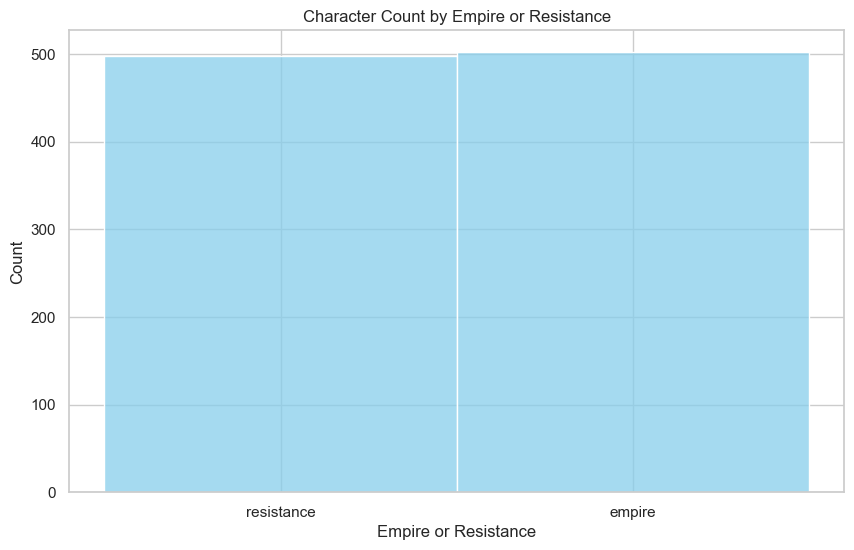

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 6))
sns.histplot(data['empire_or_resistance'], kde = False, bins = 20, color = 'skyblue')
plt.title("Character Count by Empire or Resistance")
plt.xlabel('Empire or Resistance')
plt.ylabel('Count')
plt.show()

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

X = data[['homeworld', 'unit_type']]
y = data['empire_or_resistance']

X_encoded = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size = 0.2, random_state = 42)

clf = DecisionTreeClassifier()

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = clf.score(X_test, y_test)
print(f"Accuracy: {accuracy}")

Accuracy: 0.575


In [61]:
importances = clf.feature_importances_

feature_importances = pd.DataFrame({'Feature': X_encoded.columns, 'Importance': importances})

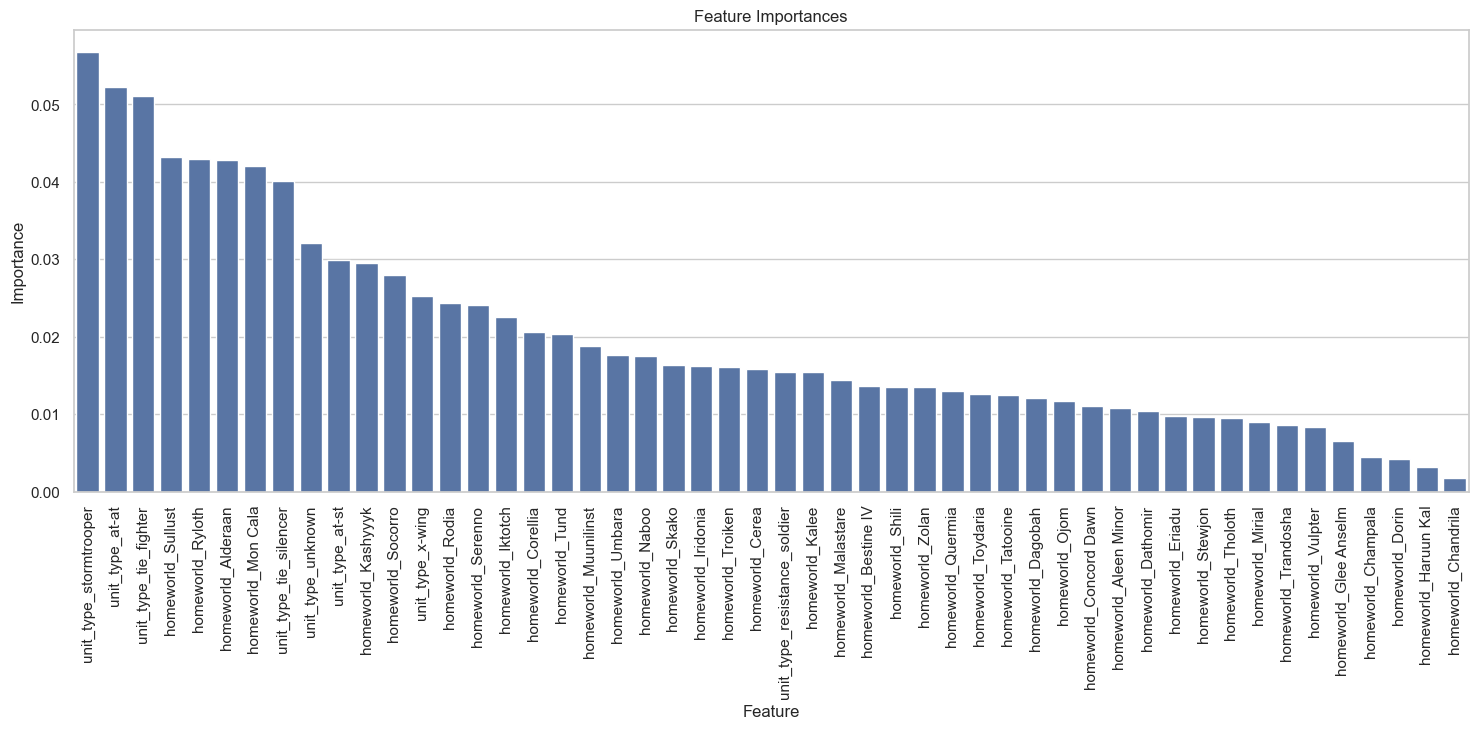

Most influential Unit Type: unit_type_stormtrooper


In [77]:
plt.figure(figsize = (18, 6))
result = feature_importances.groupby('Feature').mean().sort_values('Importance', ascending=False).index
sns.barplot(x = feature_importances['Feature'], y = feature_importances['Importance'], order = result)
plt.xticks(rotation = 90)
plt.title('Feature Importances')
plt.show()
first_value = result[0]
print(f"Most influential Unit Type: {first_value}")

In [78]:
import pickle

file_path = 'trained_model.pkl'

with open(file_path, 'wb') as file:
    pickle.dump(clf, file)